In [690]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h4> Clase contador del número de operaciones </h4>

In [691]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)


<h3>Multiplicación de matrices en tiempo O(n^3)</h3>

In [692]:
def multiplicacion(A,B, acct):
    A = np.array(A)
    B = np.array(B)
    C = np.zeros((len(A), len(A)))
    
    for i in range(0,len(A)):
        for j in range(0,len(B)):
            for k in range(0,len(A)):
                C[i,j] += A[i,k] * B[k,j]; acct.count()
    return C
    

In [693]:
A = np.random.randint(10, size=(3,3))
B = np.random.randint(10, size=(3,3))
acct = Counter()
C = multiplicacion(A,B, acct)
print (C)
acct.print_steps()

[[ 21.  67.  78.]
 [ 24.  46.  66.]
 [ 27.  33.  54.]]
Number of steps = 27


<h3>Multiplicación de matrices dividir y conquistar</h3>

In [694]:
def divide_venceras(matriz1, matriz2, acct):
    matriz1 = np.array(matriz1)
    matriz2 = np.array(matriz2)
    
    acct.count();
    if(len(matriz1) % 2 != 0):
        matriz1 = np.insert(matriz1, len(matriz1), 0, axis=1)
        matriz1 = np.insert(matriz1, len(matriz1), 0, axis=0)
        matriz2 = np.insert(matriz2, len(matriz2), 0, axis=1)
        matriz2 = np.insert(matriz2, len(matriz2), 0, axis=0)
    
    acct.count();
    if(len(matriz1) == 2):
        a = matriz1[0,0]
        b = matriz1[0,1]
        c = matriz1[1,0]
        d = matriz1[1,1]
        e = matriz2[0,0]
        f = matriz2[0,1]
        g = matriz2[1,0]
        h = matriz2[1,1]
        acct.count()
        return np.vstack((np.hstack((a*e+b*g, a*f+b*h)), np.hstack((c*e+d*g, c*f+d*h))))
        
        
    a, b, c, d = dividir(matriz1, acct); acct.count();
    e, f, g, h = dividir(matriz2, acct); acct.count();
    
    izqsup = divide_venceras(a,e, acct) + divide_venceras(b,g, acct); acct.count();
    izqinf = divide_venceras(c,e, acct) + divide_venceras(d,g, acct); acct.count();
    dersup = divide_venceras(a,f, acct) + divide_venceras(b,h, acct); acct.count();
    derinf = divide_venceras(c,f, acct) + divide_venceras(d,h, acct); acct.count();
    
    return np.vstack((np.hstack((izqsup, dersup)), np.hstack((izqinf, derinf))))

def dividir(matriz, acct):
    
    tam = int((len(matriz))/2)
    a = matriz[0:tam, 0:tam]
    b = matriz[0:tam, tam:]
    c = matriz[tam:, 0:tam]
    d = matriz[tam:,tam:]
    return a, b, c, d



In [695]:
A = np.random.randint(10, size=(3, 3))
B = np.random.randint(10, size=(3, 3))
acct = Counter()
C = divide_venceras(A,B, acct)
print(C)
acct.print_steps()

[[109  73 123   0]
 [110  76 109   0]
 [ 71  43  94   0]
 [  0   0   0   0]]
Number of steps = 32


<h3>Multiplicación de matrices utilizando algoritmo de Strassen</h3>

In [696]:
def strassen(matriz1, matriz2, acct):
    matriz1 = np.array(matriz1)
    matriz2 = np.array(matriz2)
    
    if(len(matriz1) % 2 != 0):
        matriz1 = np.insert(matriz1, len(matriz1), 0, axis=1)
        matriz1 = np.insert(matriz1, len(matriz1), 0, axis=0)
        matriz2 = np.insert(matriz2, len(matriz2), 0, axis=1)
        matriz2 = np.insert(matriz2, len(matriz2), 0, axis=0)
        
    if(len(matriz1) == 2):
        a = matriz1[0,0]
        b = matriz1[0,1]
        c = matriz1[1,0]
        d = matriz1[1,1]
        e = matriz2[0,0]
        f = matriz2[0,1]
        g = matriz2[1,0]
        h = matriz2[1,1]
        p1 = a*(f-h); acct.count()
        p2 = (a+b)*h; acct.count()
        p3 = (c+d)*e; acct.count()
        p4 = d*(g-e); acct.count()
        p5 = (a+d)*(e+h); acct.count()
        p6 = (b-d)*(g+h); acct.count()
        p7 = (a-c)*(e+f); acct.count()
        s = p5+p4-p2+p6
        t = p1+p2
        u = p3+p4
        v = p5+p1-p3-p7
        return np.vstack((np.hstack((s,t)), np.hstack((u,v))))
        
        
    a, b, c, d = dividir(matriz1, acct); acct.count()
    e, f, g, h = dividir(matriz2, acct); acct.count()
    
    p1 = strassen(a,(f-h), acct); acct.count()
    p2 = strassen((a+b),h, acct); acct.count()
    p3 = strassen((c+d),e, acct); acct.count()
    p4 = strassen(d,(g-e), acct); acct.count()
    p5 = strassen((a+d),(e+h), acct); acct.count()
    p6 = strassen((b-d),(g+h), acct); acct.count()
    p7 = strassen((a-c),(e+f), acct); acct.count()
    s = p5+p4-p2+p6
    t = p1+p2
    u = p3+p4
    v = p5+p1-p3-p7
    
    return np.vstack((np.hstack((s, t)), np.hstack((u, v))))

def dividir(matriz, acct):
    
    tam = int((len(matriz))/2)    
    a = matriz[0:tam, 0:tam]    
    b = matriz[0:tam, tam:]
    c = matriz[tam:, 0:tam]
    d = matriz[tam:,tam:]
    return a, b, c, d


In [697]:
A = np.random.randint(10, size=(3, 3))
B = np.random.randint(10, size=(3, 3))
acct=Counter()
C = strassen(A,B, acct)
print(C)
acct.print_steps()

[[ 5  3 22  0]
 [42 29 83  0]
 [21 43 82  0]
 [ 0  0  0  0]]
Number of steps = 58


In [698]:
import random as rnd

def analisis_multiplicacion(n):
    results = []
    acct = Counter()
    for i in range(2,n):
        a = np.random.randint(10, size=(i,i))
        b = np.random.randint(10, size=(i,i))
        acct.reset()
        multiplicacion(a,b,acct)
        results.append(acct.steps)
    return results


In [700]:
import random as rnd

def analisis_dividir(n):
    results = []
    acct = Counter()
    for i in range(2,n):
        a = np.random.randint(10, size=(i,i))
        b = np.random.randint(10, size=(i,i))
        acct.reset()
        divide_venceras(a,b,acct)
        results.append(acct.steps)
    return results

In [702]:
import random as rnd

def analisis_strassen(n):
    results = []
    acct = Counter()
    for i in range(2,n):
        a = np.random.randint(10, size=(i,i))
        b = np.random.randint(10, size=(i,i))
        acct.reset()
        strassen(a,b,acct)
        results.append(acct.steps)
    return results

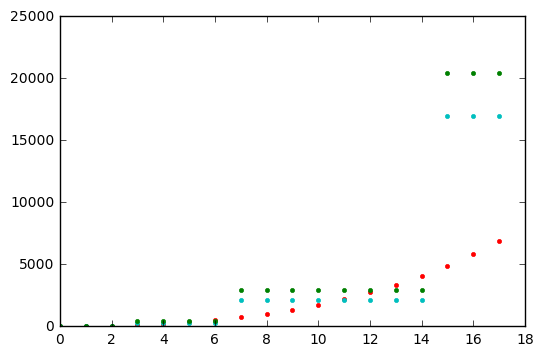

In [707]:
pl.clf()
x = np.arange(98)
y = np.array(analisis_multiplicacion(100))
pl.plot(x, y, 'k.', color ='r')
z = np.array(analisis_dividir(100))
pl.plot(x, z, 'k.', color='c')
w = np.array(analisis_strassen(100))
pl.plot(x, w, 'k.', color='g')
